In [1]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR output


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)


In [3]:
np.random.seed(42)

input_size = 2
hidden_size = 4
output_size = 1
lr = 0.1
epochs = 10000

# Initialize weights and biases
w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [4]:
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    # Loss (Mean Squared Error)
    loss = np.mean((y - a2) ** 2)

    # Backpropagation
    error = y - a2
    d_output = error * sigmoid_deriv(a2)

    d_hidden = np.dot(d_output, w2.T) * sigmoid_deriv(a1)

    # Update weights and biases
    w2 += np.dot(a1.T, d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    w1 += np.dot(X.T, d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.2832
Epoch 1000, Loss: 0.2452
Epoch 2000, Loss: 0.2124
Epoch 3000, Loss: 0.1503
Epoch 4000, Loss: 0.0572
Epoch 5000, Loss: 0.0209
Epoch 6000, Loss: 0.0107
Epoch 7000, Loss: 0.0067
Epoch 8000, Loss: 0.0047
Epoch 9000, Loss: 0.0035


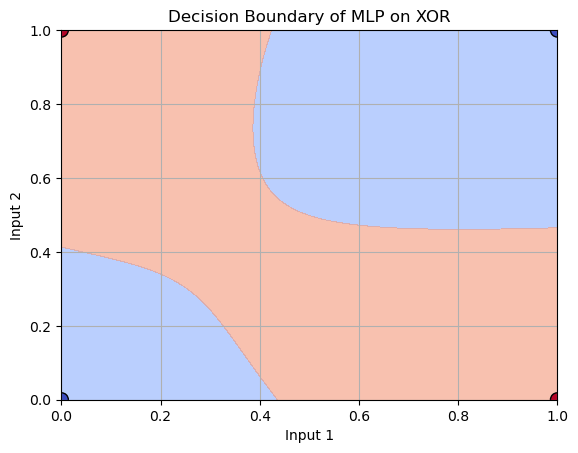

In [5]:
# Create meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass for grid
z1 = np.dot(grid, w1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, w2) + b2
a2 = sigmoid(z2)
Z = a2.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap='coolwarm')
plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='coolwarm', edgecolors='k', s=100)
plt.title("Decision Boundary of MLP on XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()
